# **Baseball Case Study Win Prediction** 

**Problem Definition :**

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

The prediction is continuous, so we will use different regression models to predict the wins.

**Description of the Dataset :**

**Input features:**

    R  - Runs
    AB - At Bats
    H  - Hits
    2B - Doubles
    3B - Triples
    HR - Homeruns
    BB - Walks
    SO - Strikeouts
    SB - Stolen Bases
    RA - Runs Allowed
    ER - Earned Runs
    ERA - Earned Run Average (ERA)
    CG - Complete games ( referred online)
    SHO - Shutouts
    SV - Saves
    E - Errors

 **Output features:**

    W -Number of predicted wins (W)

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Importing the python libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Reading the CSV file of the Dataset

Ball = pd.read_csv('/content/drive/MyDrive/Python_Datasets/baseball.csv')  # Pandas read_csv() function imports a CSV file (in our case, 'baseball.csv') to DataFrame format.

In [6]:
#Examining the Data

pd.set_option('display.max_rows',None) #Display all rows 
Ball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [7]:
Ball.columns #Display all columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

*After importing the data, to learn more about the dataset, we’ll use .head() .info() and .describe() methods.*

In [8]:
Ball.head() #Display first 5 rows of the Dataset

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [9]:
Ball.info() #Complete Information of the Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


**Observation :**

1. All the attributes in dataset contains numerical values of int and float type .
2.And 'W' i.e, Number of predicted wins is our target variable which is of continous type .

In [10]:
Ball.describe() # Description of the Dataset

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


**Observation :**

1.There is not much difference between Mean and Median of all Attributes .

2.The standard deviation is high in all the columns


In [11]:
Ball.shape #Check the shape of the Dataset

(30, 17)

**Observation :**

The Dataset contains 30 rows and 17 columns i.e, instaces of Baseball Case Study .

In [12]:
# checking complete features, their shape, duplicate values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", Ball.columns)
shape=Ball.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", Ball.dtypes)
print("\nDataset contains any NaN/Empty cells : ", Ball.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", Ball.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in Ball.columns.values:
    print("Number of unique values of {} : {}".format(col, Ball[col].nunique()))


Features Present in the Dataset: 
 Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Total Number of Rows :  30
Total Number of Features :  17


Data Types of Features :
 W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Dataset contains any NaN/Empty cells :  False

Total number of empty rows in each feature:
 W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64 


Total number of unique values in each feature:
Number of unique values of W : 24
Number of unique values of R : 28
Number of unique values of AB : 29
Number of unique values of H : 29
Number of unique values o

**Observation :** 

1.There are no null values present in the entire Dataset .

2.There are no categorical values present . Hence no need to use Label Encoder .

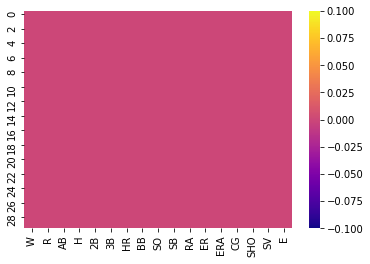

In [13]:
#Visualizing Null Values through Heat-Map
sns.heatmap(Ball.isnull(),cmap='plasma')

**Observation :**

This is a very clean Dataset .

# **EDA(Exploratory Data Analysis)**

**1.Univariant Analysis** 

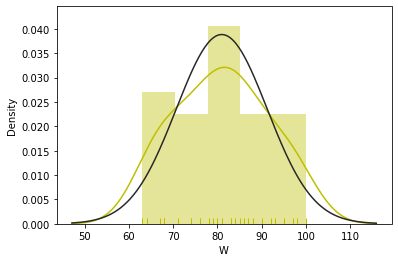

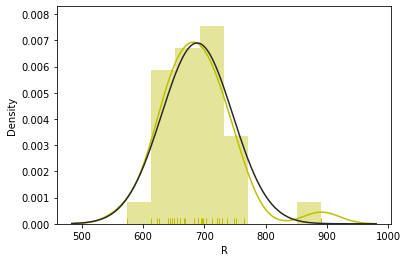

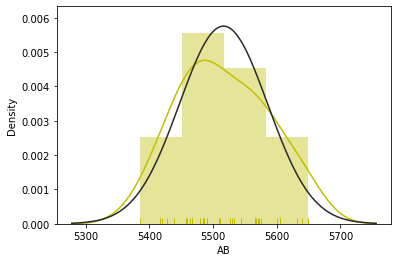

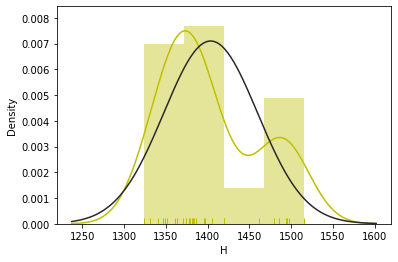

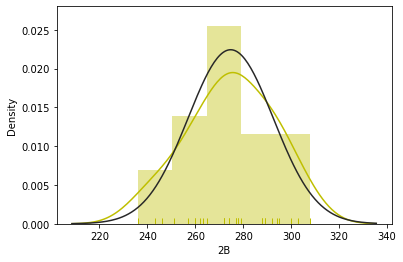

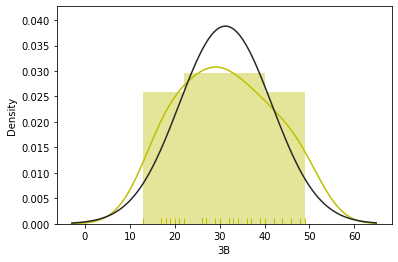

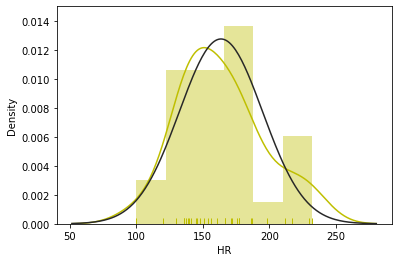

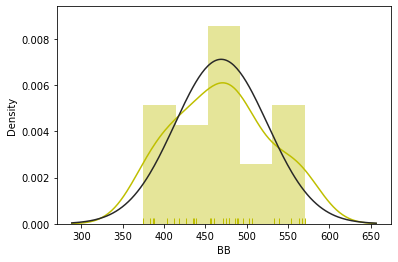

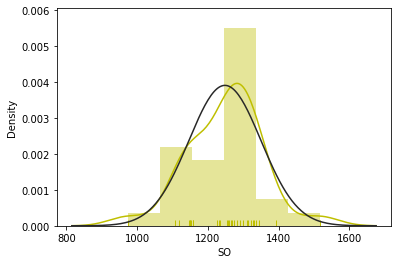

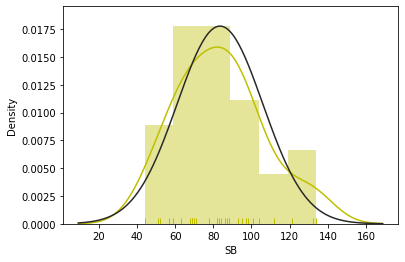

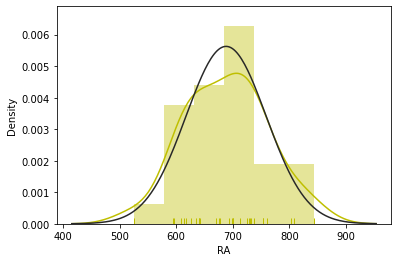

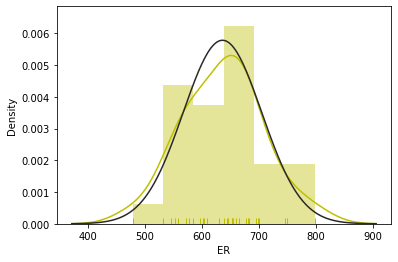

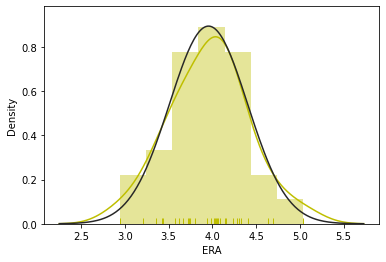

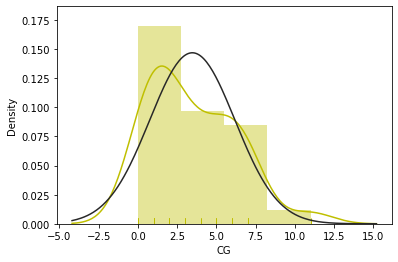

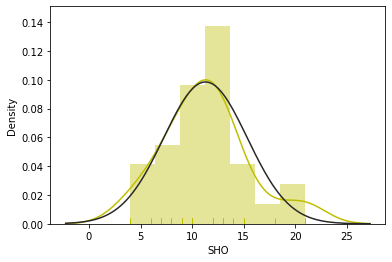

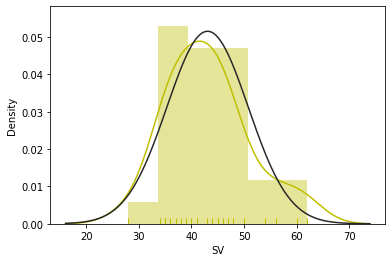

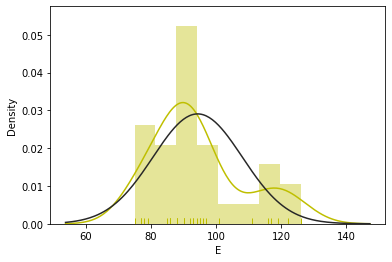

In [15]:
#Distplot to see skewness in different Columns 

from scipy.stats import norm
for g in Ball.describe().columns:
    sns.distplot(Ball[g] , rug=True , color = 'y' , fit=norm)
    plt.show()

**Observation :**

As per above plotting,

1.Some of the Attributes are normally distributed in Dataset and doesn't contain Skewed Data .

2.Except Attributes namely Hits(H),Homeruns(HR),Strikeouts(SO),Complete games(CG),Shutouts(SHO),Errors(E) have skewness and need to be removed .

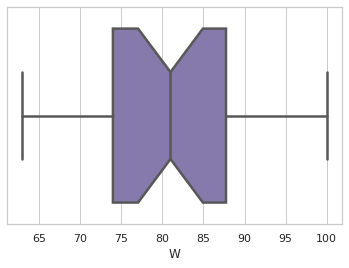

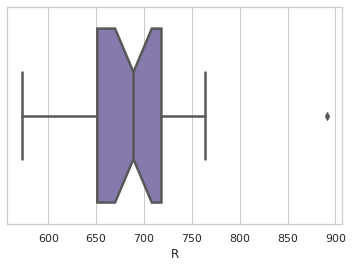

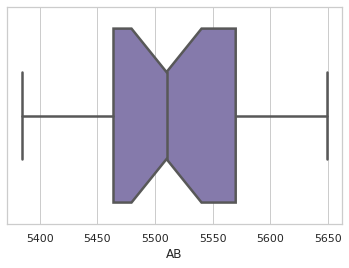

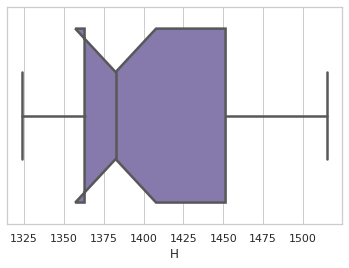

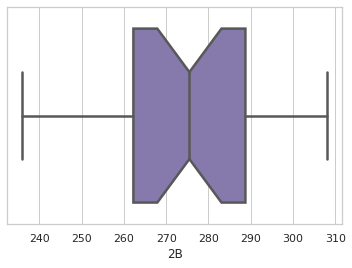

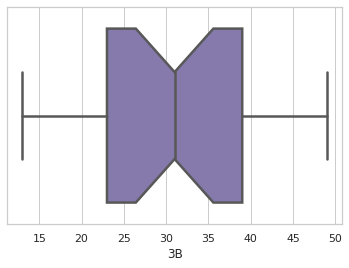

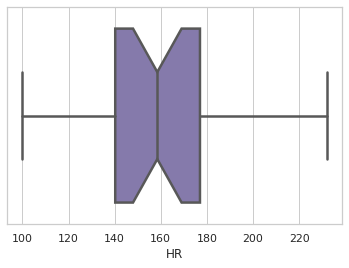

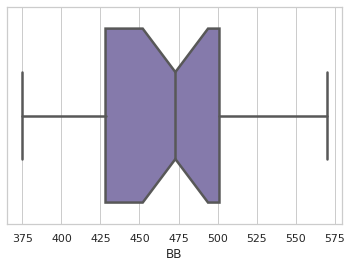

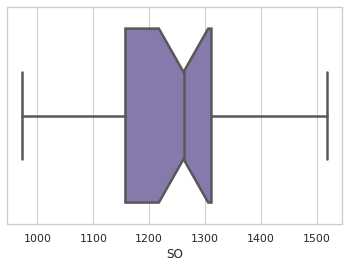

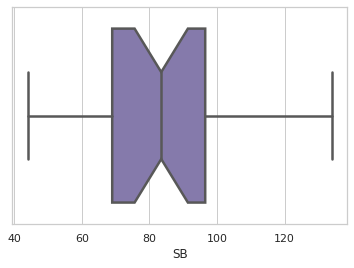

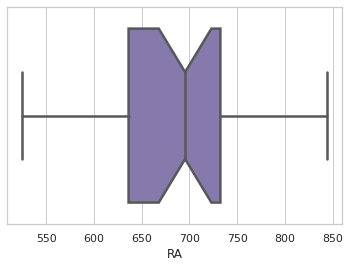

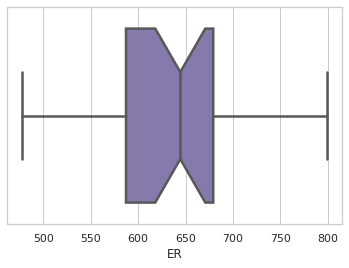

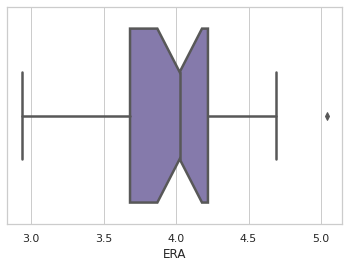

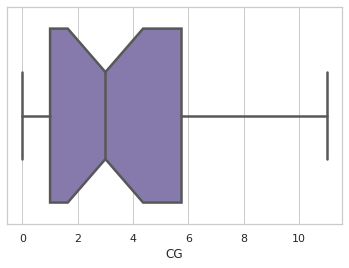

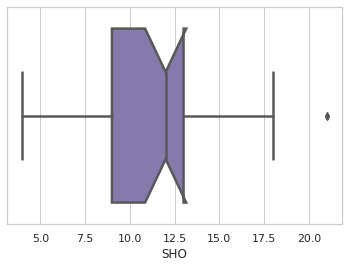

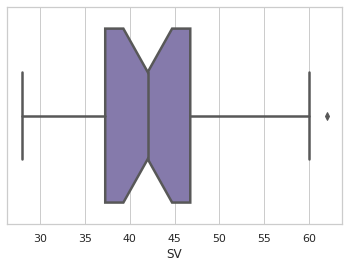

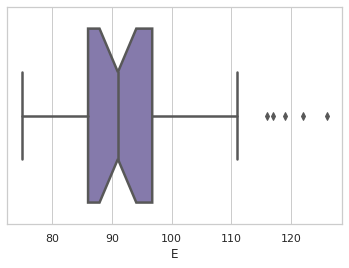

In [16]:
#Boxplot to see outliers in different Columns 

sns.set_theme(style="whitegrid")
for g in Ball.describe().columns:
    sns.boxplot(Ball[g] , color = 'm' , notch ='True',linewidth=2.5)
    plt.show()

**Observation :**

From the above plot ,

1.Attributes namely Runs(R),Earned Run Average (ERA),Shutouts(SHO),Saves(SV),Errors(E) have some outliers .

2.Some of the columns are very near to whisker namely SV,ERA,SHO.

3.All other attributes dont have any outlier.

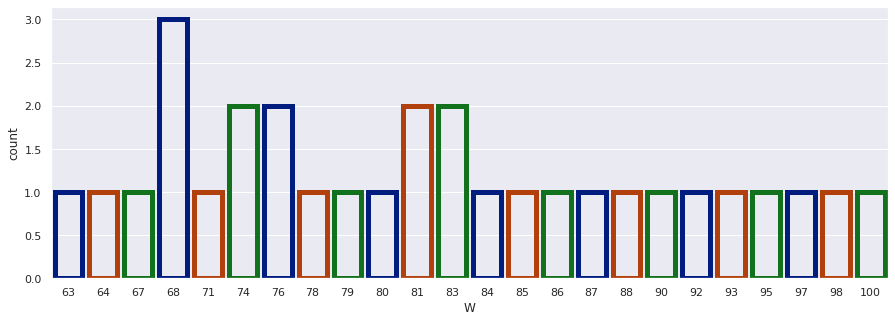

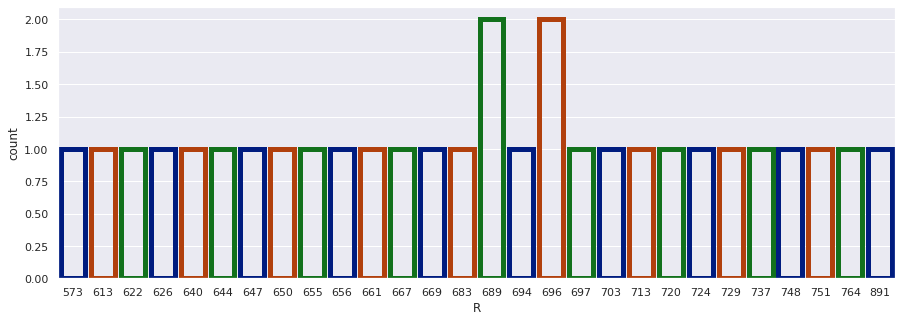

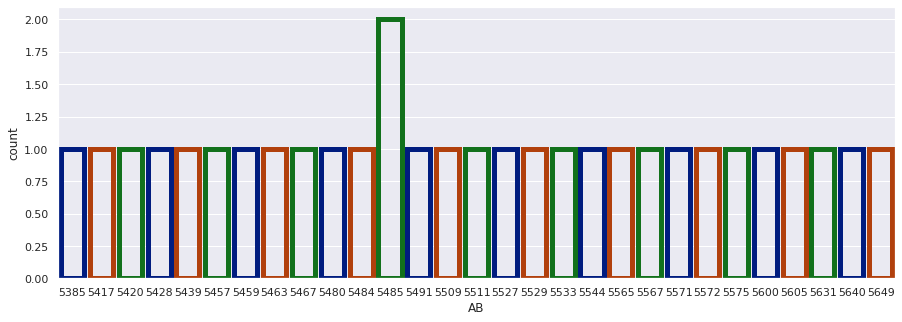

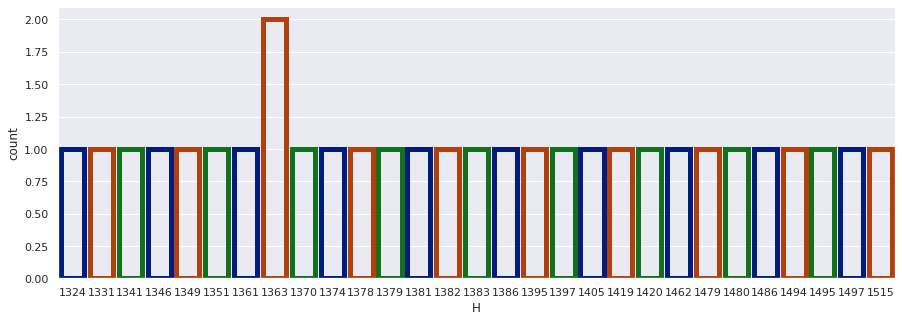

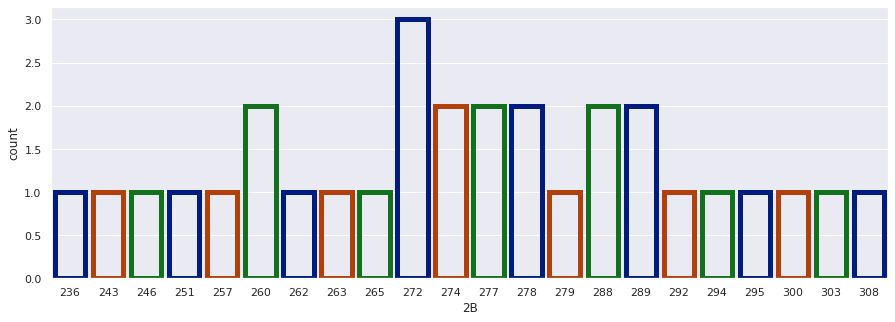

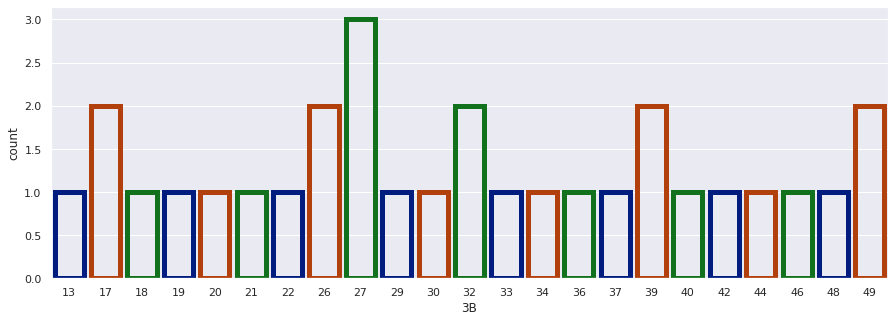

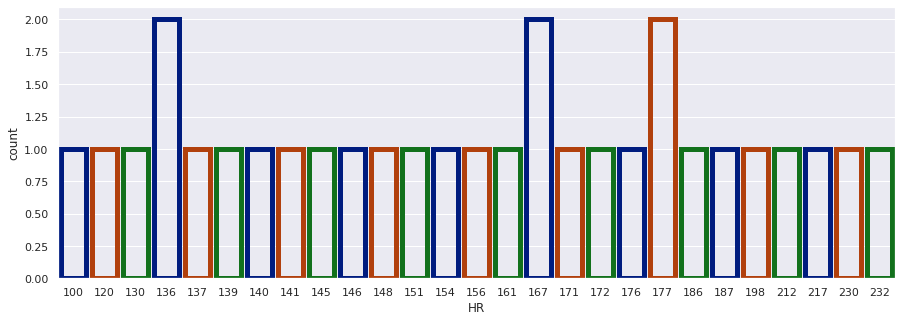

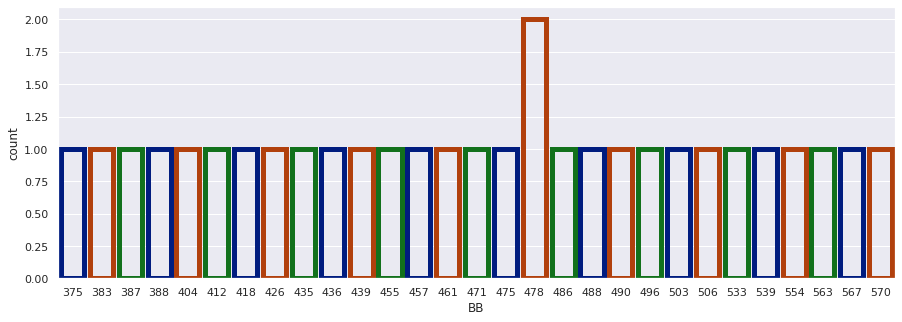

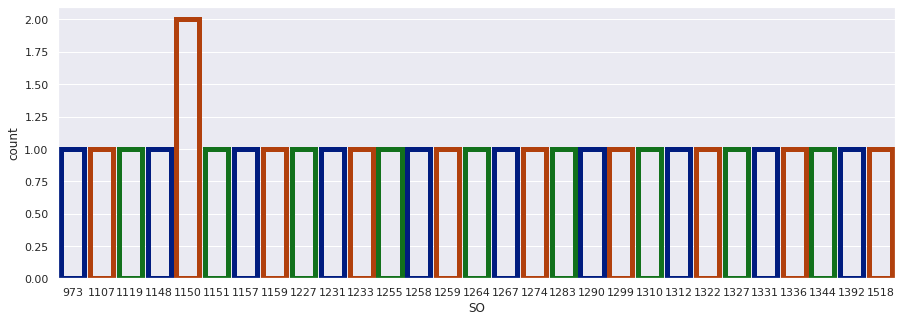

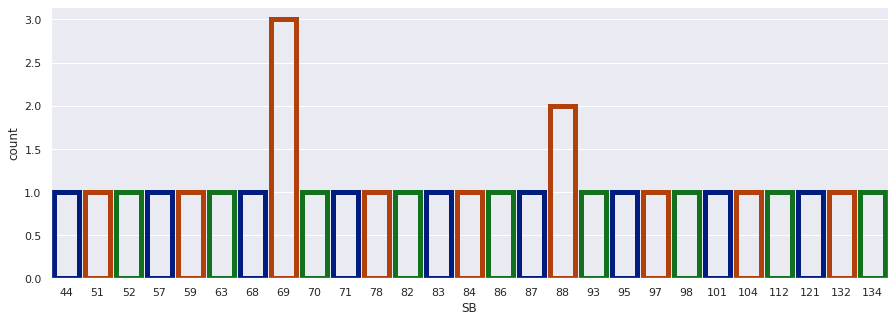

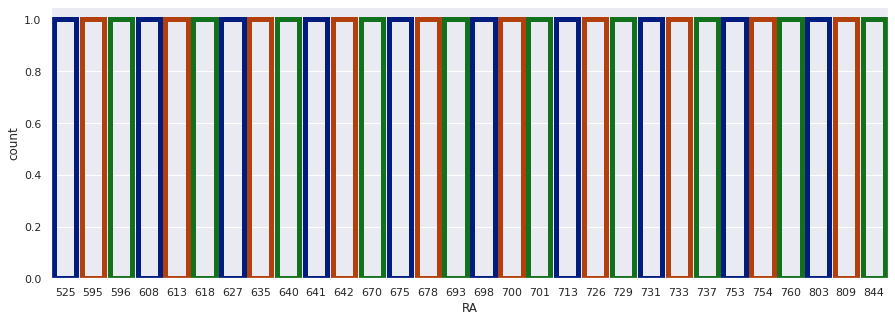

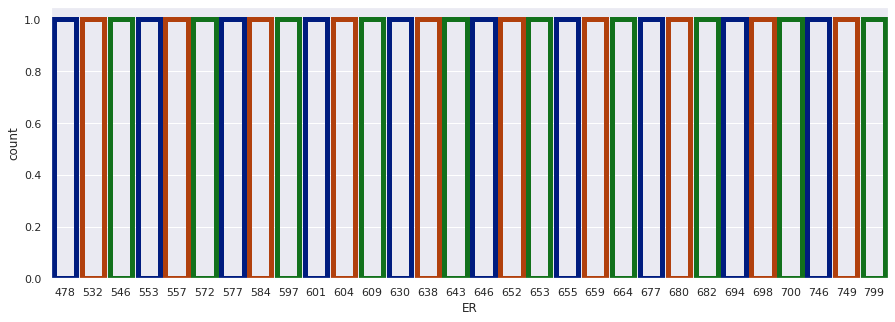

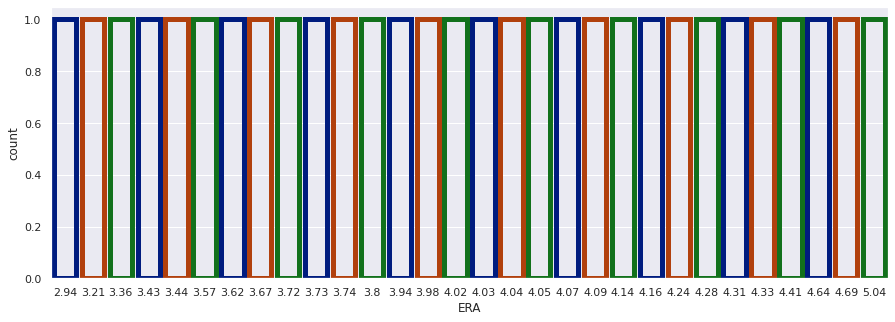

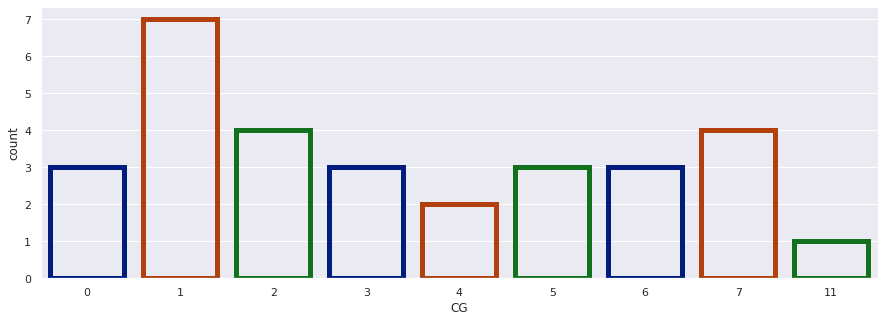

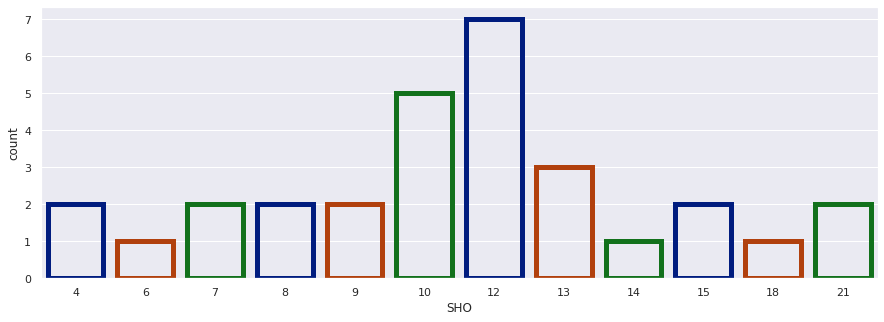

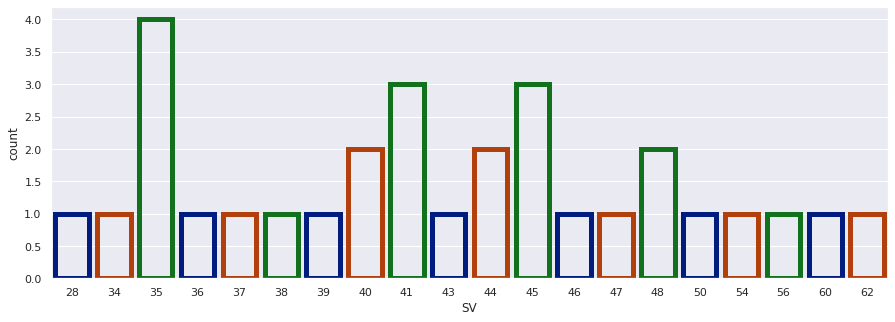

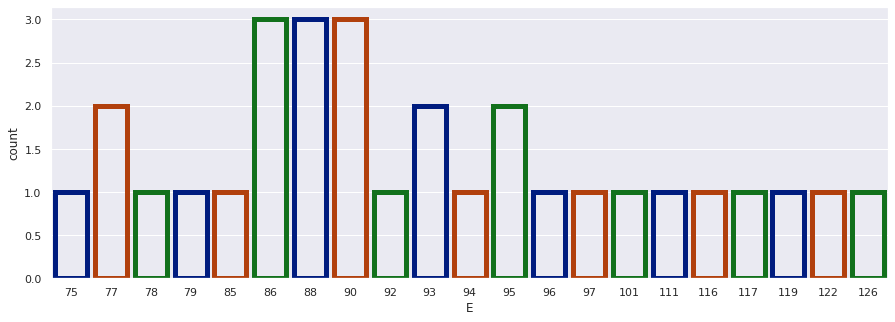

In [18]:
#Countplot to see all unique values in different Columns 

sns.set_theme(style="darkgrid")
for g in Ball.describe().columns:
    plt.figure(figsize=(15,5))
    sns.countplot(Ball[g] , color = 'm' , facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
    plt.show()

**Observation :** 

From the above plot , we observed all unique values from all attributes in the Dataset with their number of count . 

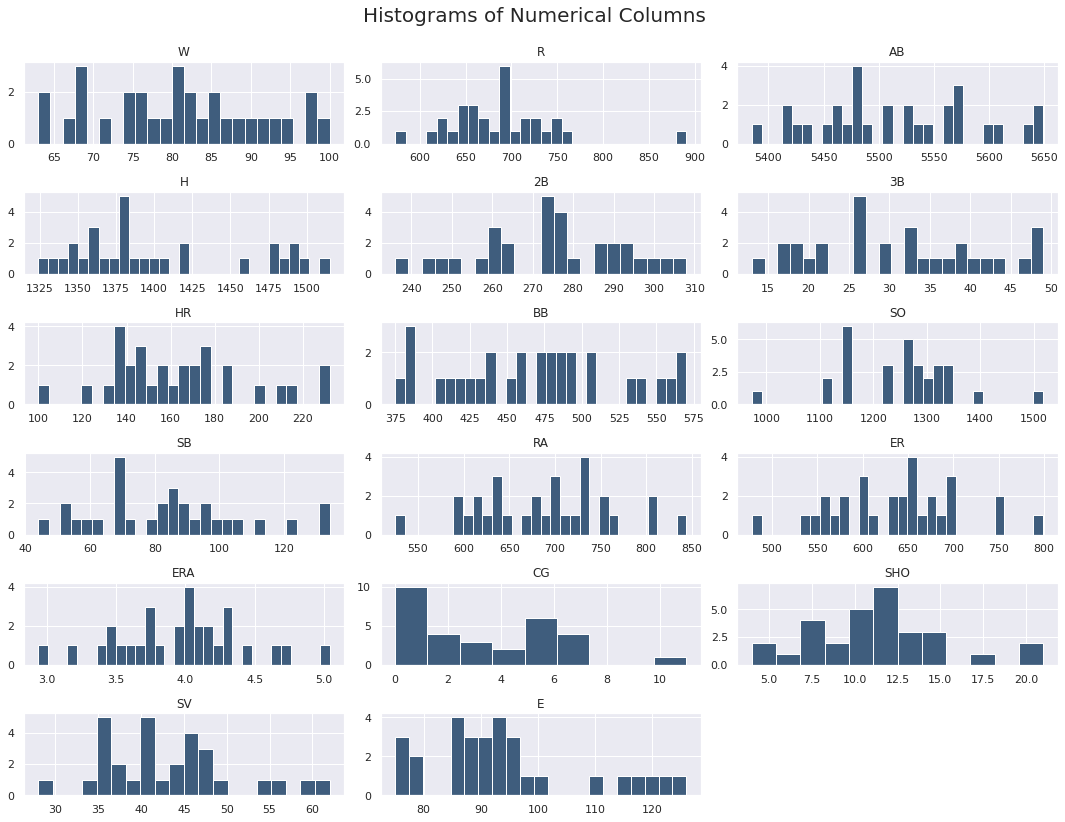

In [19]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(Ball.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(Ball.columns.values[i])

    vals = np.size(Ball.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(Ball.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

**Observation**:

From the above plot , we observed all numerical values in the Dataset .

**2.Bivariant Analysis**

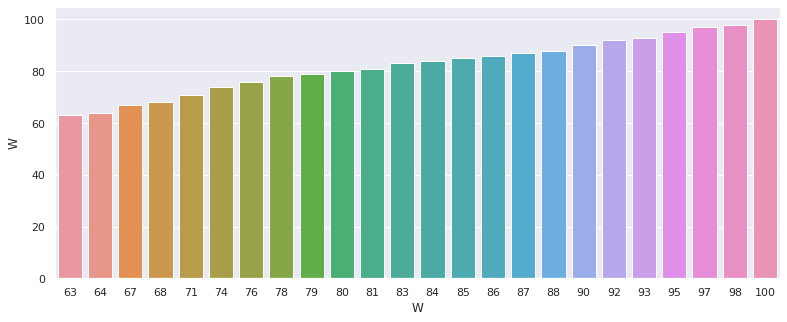

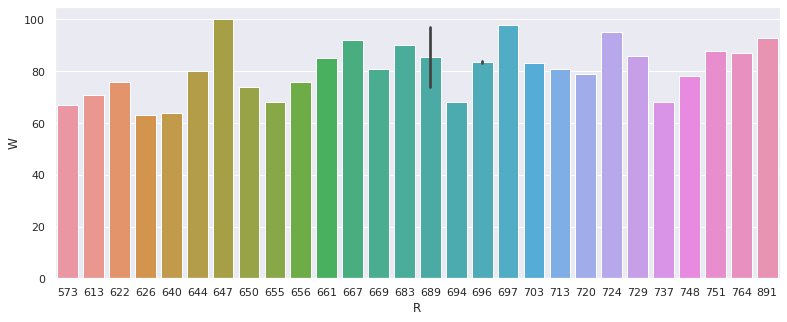

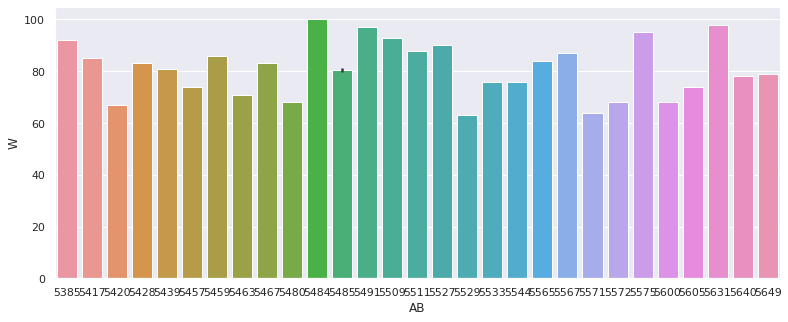

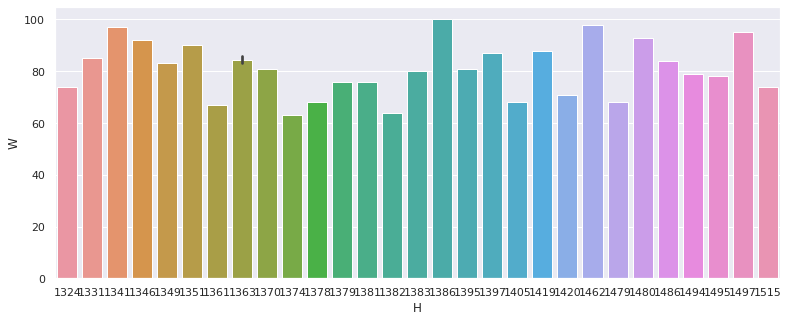

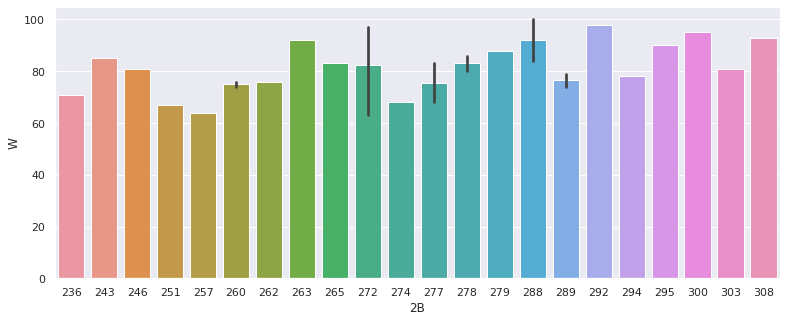

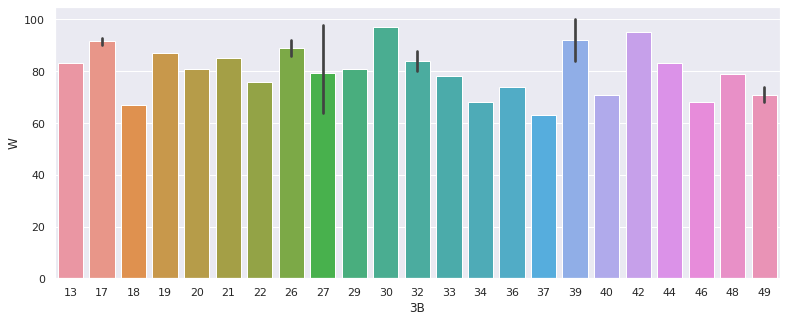

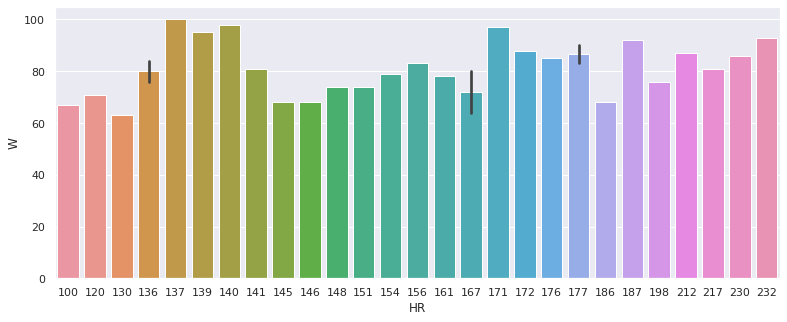

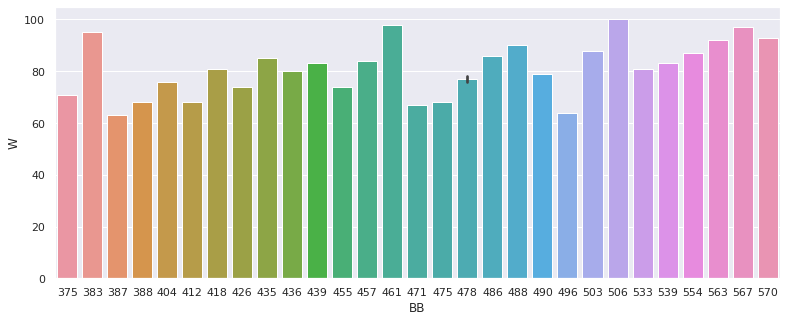

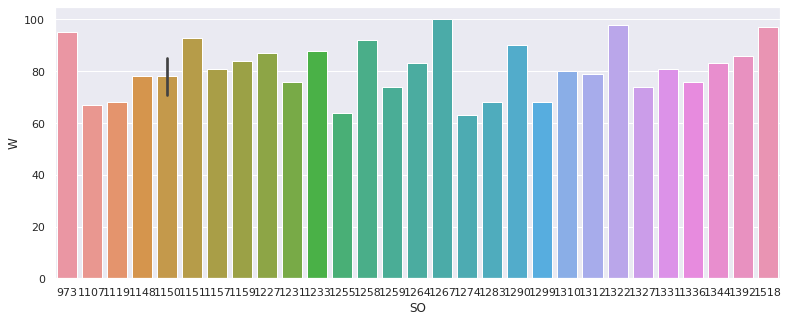

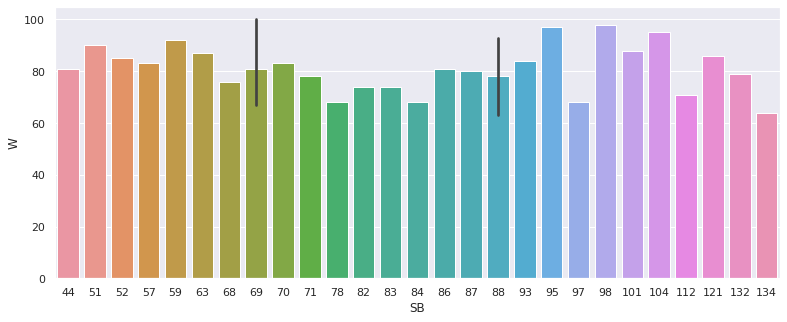

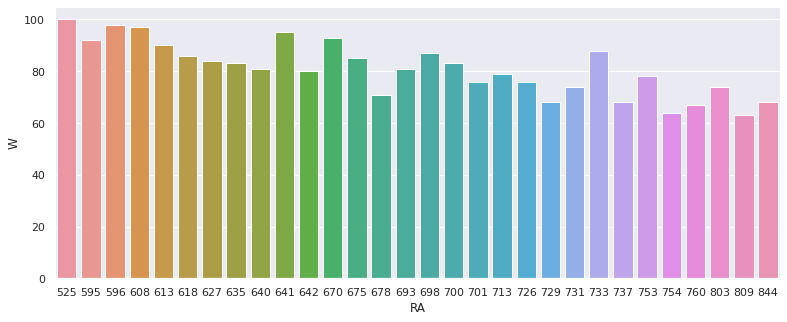

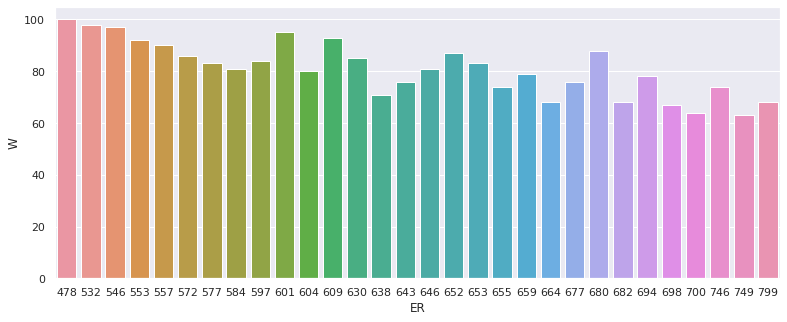

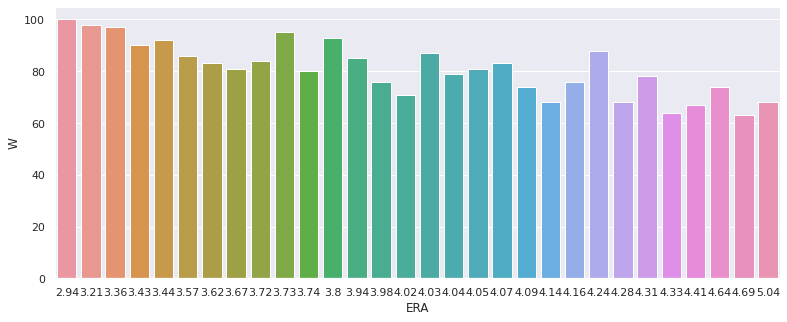

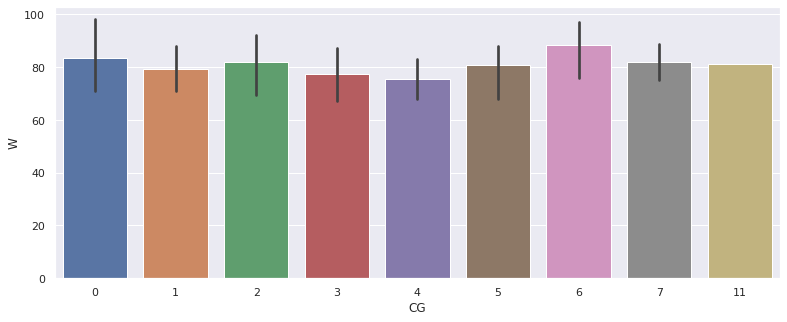

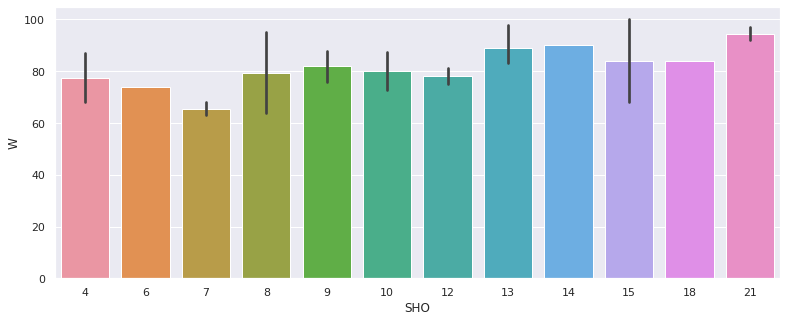

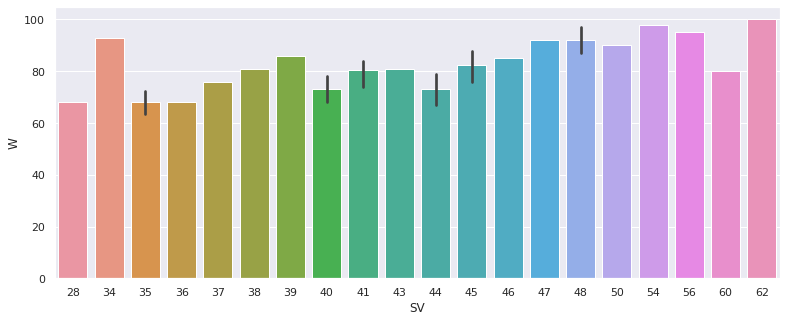

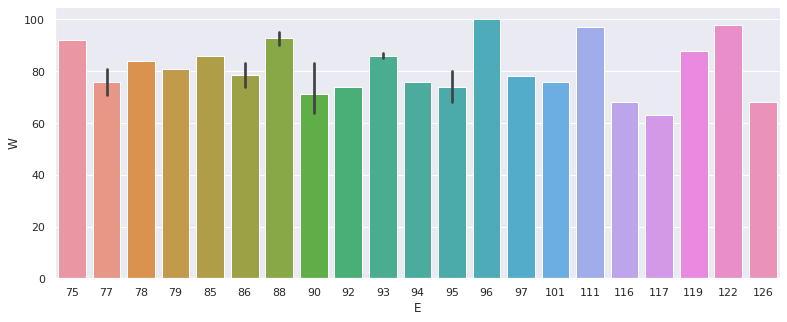

In [20]:
#Checking relation between feature and target variable 

for i in Ball.columns:
    plt.figure(figsize=(13,5))
    sns.barplot(x=Ball[i],y=Ball.W,label = Ball)

**Observation :**

Above Plot shows the relation between all features and target variables .

**Scatter_plot showing relationship between feature and target value .**

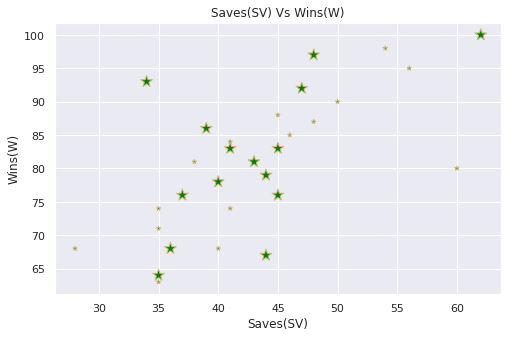

In [21]:
#Scatter_plot showing relation between Saves(SV) and Wins(W)

plt.figure(figsize=(8,5))
plt.title('Saves(SV) Vs Wins(W)')
plt.scatter(x='SV',y='W',data=Ball,sizes=(20, 150),edgecolors='y',c='green',marker ="*")
plt.xlabel("Saves(SV)")
plt.ylabel("Wins(W)")
plt.show()

**Observation :** From the above plot ,it seems that due to Saves(SV) , the team is getting to win the game .

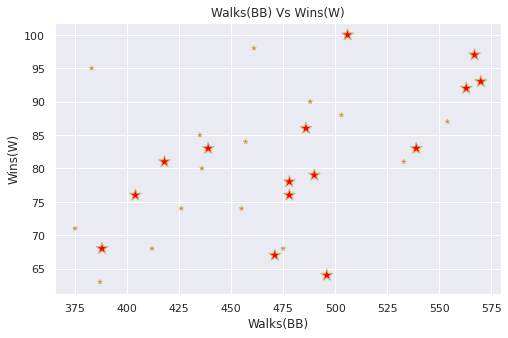

In [22]:
#Scatter_plot showing relation between Walks(BB) and Wins(W)

plt.figure(figsize=(8,5))
plt.title('Walks(BB) Vs Wins(W)')
plt.scatter(x='BB',y='W',data=Ball,sizes=(20, 150),edgecolors='y',c='red',marker ="*")
plt.xlabel("Walks(BB)")
plt.ylabel("Wins(W)")
plt.show()

**Observation :** From the above plot ,it seems that due to Walks(BB) , the team is getting to win the game .

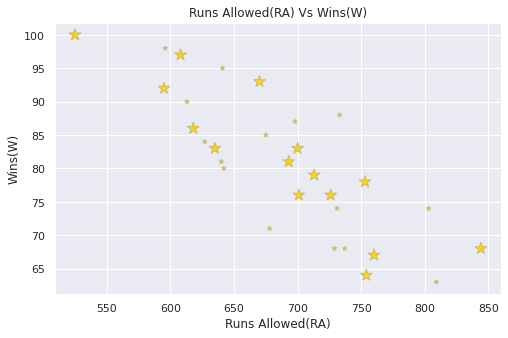

In [23]:
#Scatter_plot showing relation between Runs Allowed(RA) and Wins(W)

plt.figure(figsize=(8,5))
plt.title('Runs Allowed(RA) Vs Wins(W)')
plt.scatter(x='RA',y='W',data=Ball,sizes=(20, 150),edgecolors='y',c='gold',marker ="*")
plt.xlabel("Runs Allowed(RA)")
plt.ylabel("Wins(W)")
plt.show()

**Observation**: From the above plot ,it seems that due to Runs Allowed(RA) , the team is getting to loose the game 

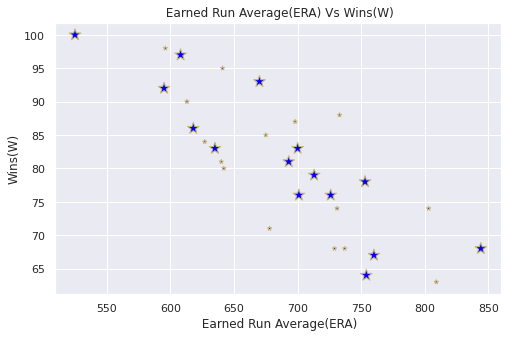

In [25]:
#Scatter_plot showing relation between  Earned Run Average(ERA) and Wins(W)

plt.figure(figsize=(8,5))
plt.title(' Earned Run Average(ERA) Vs Wins(W)')
plt.scatter(x='RA',y='W',data=Ball,sizes=(20, 150),edgecolors='y',c='blue',marker ="*")
plt.xlabel(" Earned Run Average(ERA)")
plt.ylabel("Wins(W)")
plt.show()

**Observation**: From the above plot ,it seems that due to Earned Run Average(ERA) , the team is getting to loose the game

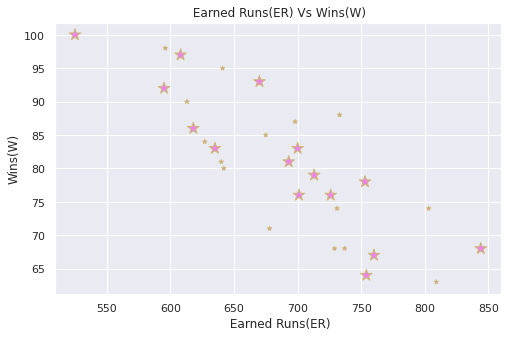

In [26]:
#Scatter_plot showing relation between  Earned Runs(ER) and Wins(W)

plt.figure(figsize=(8,5))
plt.title(' Earned Runs(ER) Vs Wins(W)')
plt.scatter(x='RA',y='W',data=Ball,sizes=(20, 150),edgecolors='y',c='violet',marker ="*")
plt.xlabel(" Earned Runs(ER)")
plt.ylabel("Wins(W)")
plt.show()

**Observation :** From the above plot ,it seems that due to Earned Runs(ER) , the team is getting to loose the game

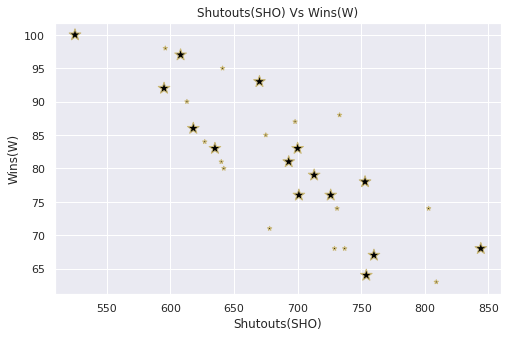

In [27]:
#Scatter_plot showing relation between  Shutouts(SHO) and Wins(W)

plt.figure(figsize=(8,5))
plt.title('Shutouts(SHO) Vs Wins(W)')
plt.scatter(x='RA',y='W',data=Ball,sizes=(20, 150),edgecolors='y',c='black',marker ="*")
plt.xlabel("Shutouts(SHO)")
plt.ylabel("Wins(W)")
plt.show()

**Observation :** From the above plot ,it seems that due to Shutouts(SHO) , the team is getting to win the game .

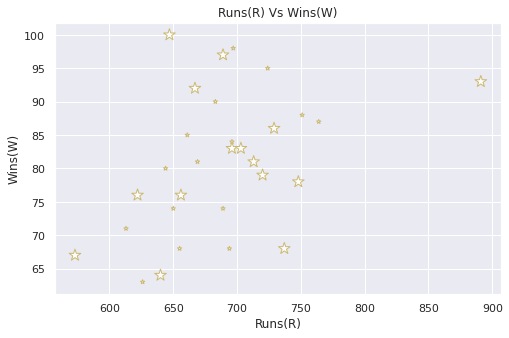

In [28]:
#Scatter_plot showing relation between  Runs(R) and Wins(W)

plt.figure(figsize=(8,5))
plt.title('Runs(R) Vs Wins(W)')
plt.scatter(x='R',y='W',data=Ball,sizes=(20, 150),edgecolors='y',c='white',marker ="*")
plt.xlabel("Runs(R)")
plt.ylabel("Wins(W)")
plt.show()

**Observation :** From the above plot ,it seems that due to Runs(R) , the team is getting to win the game .

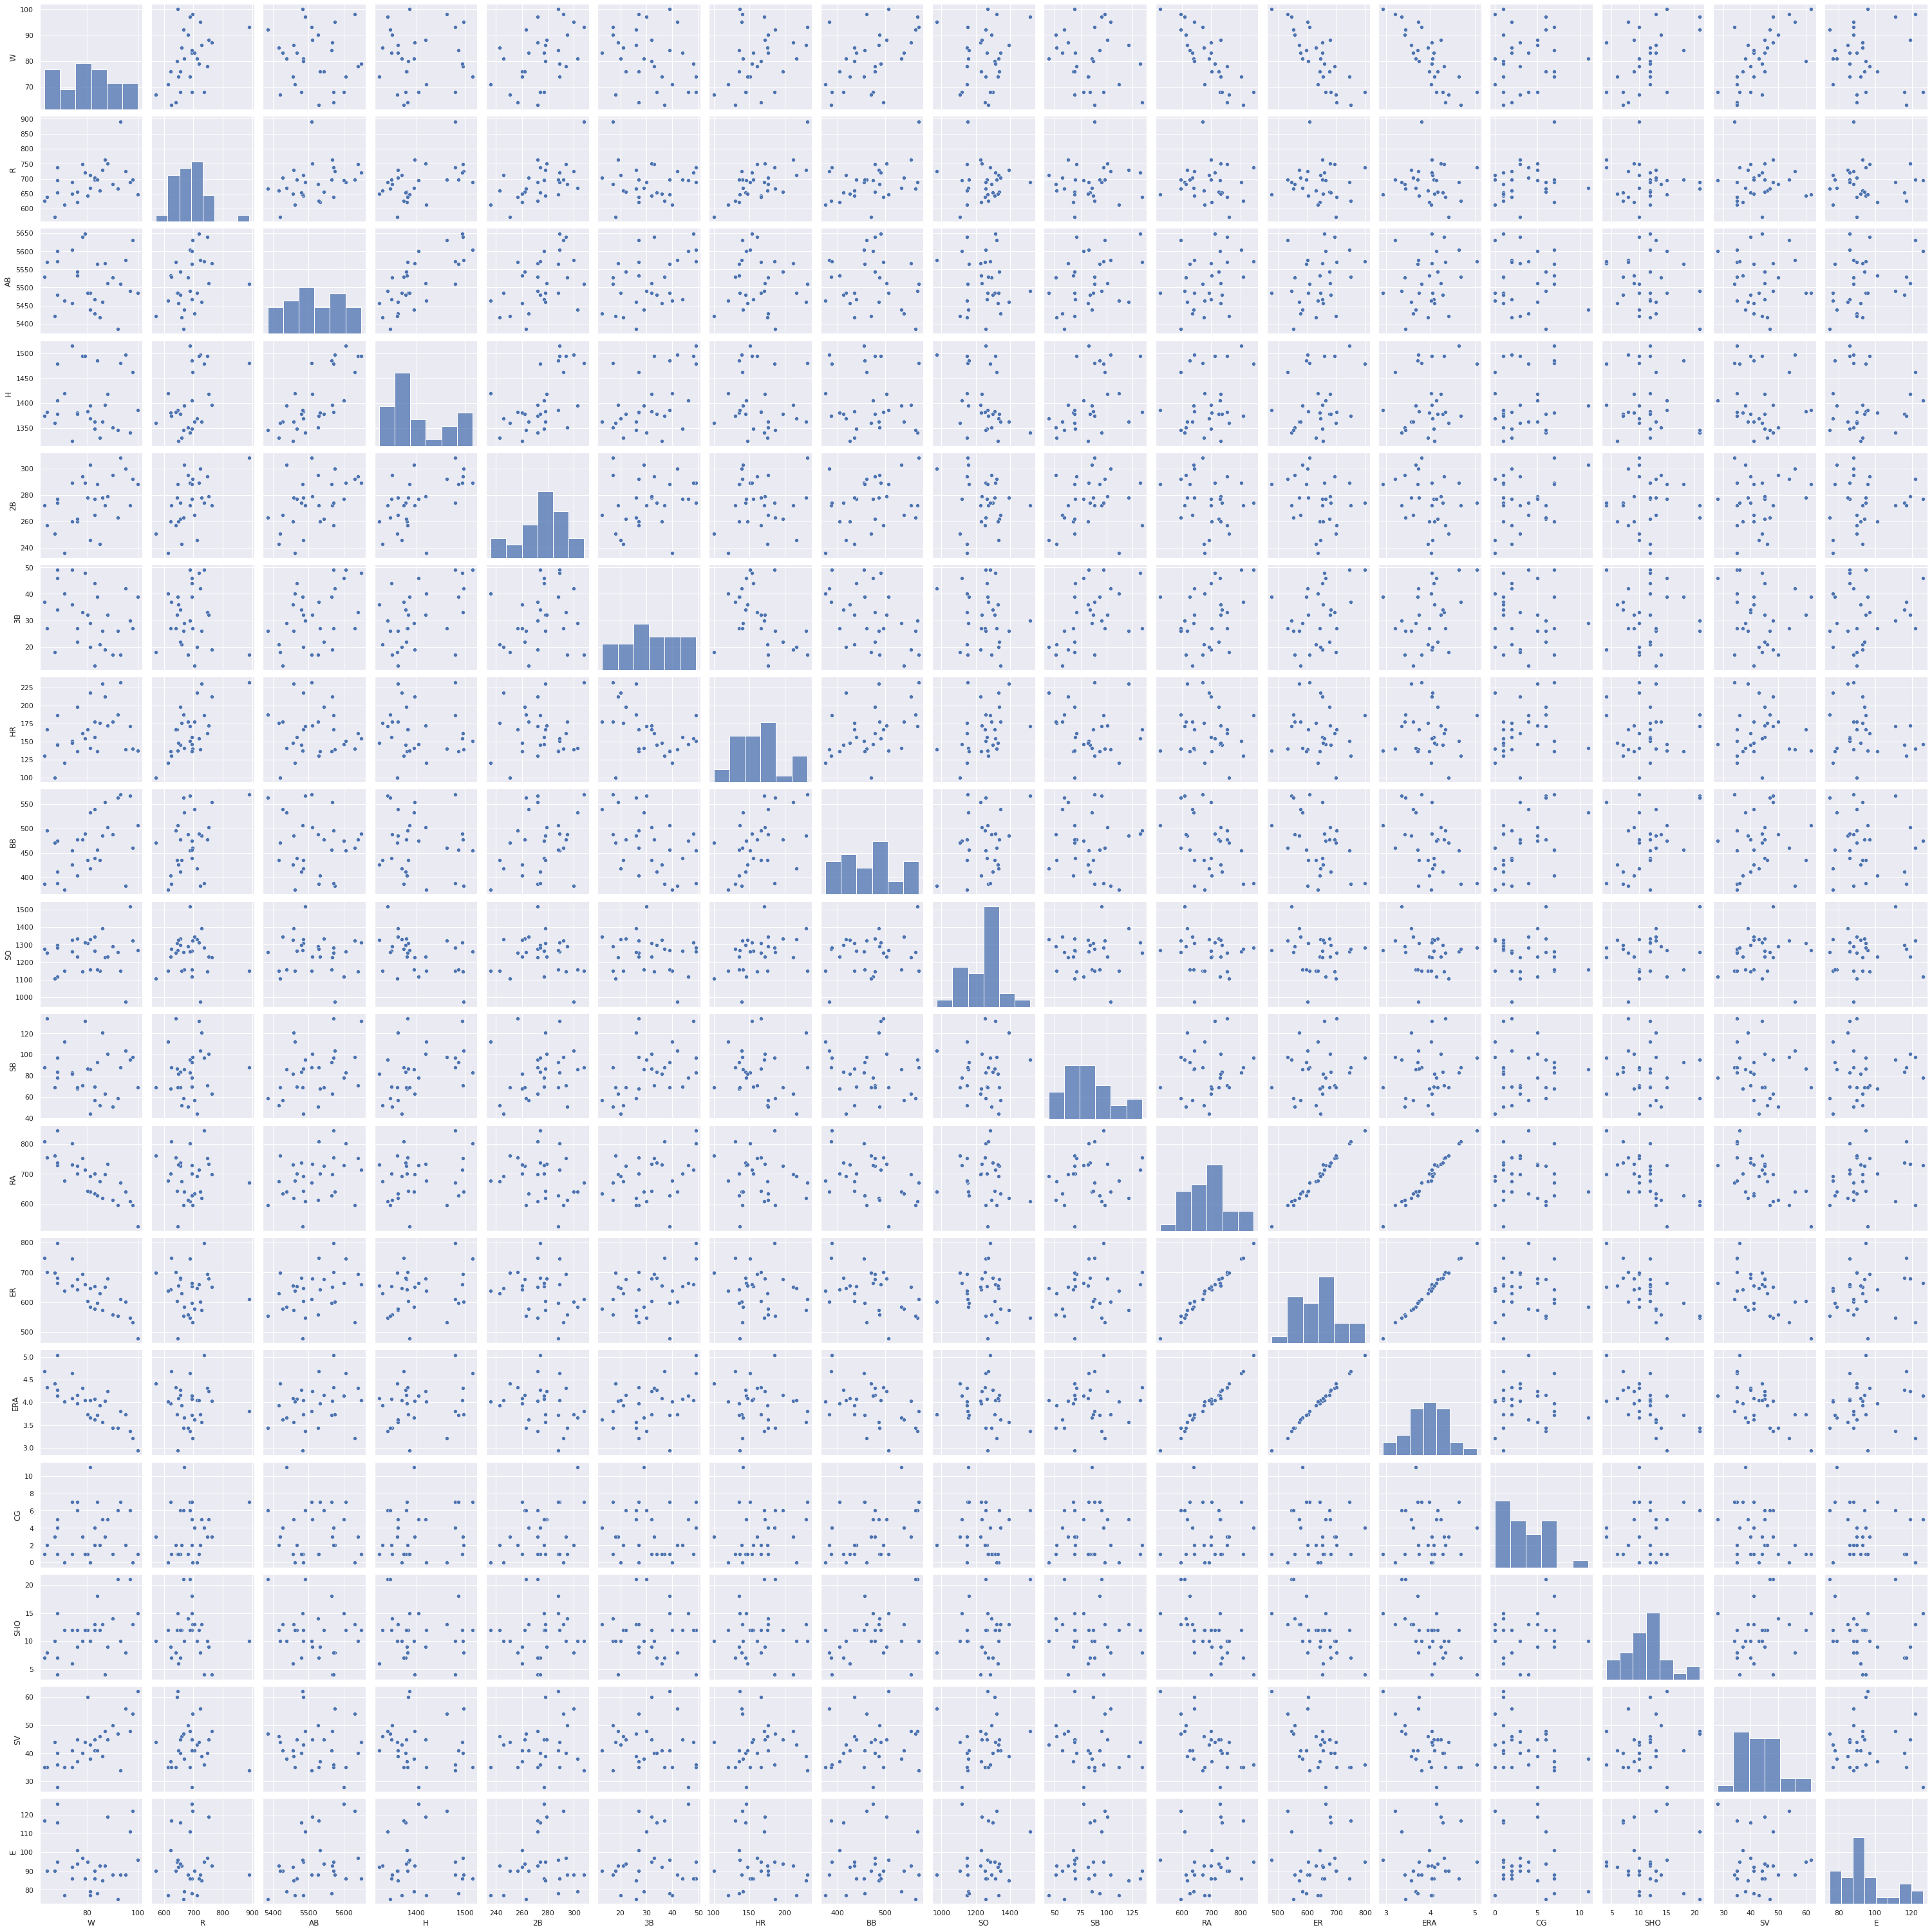

In [ ]:
sns.pairplot(Ball)

**Observation**: In above plot , we observed multiple pairwise bivariate distributions in the dataset .Can not Judge anything becuase plot is too small, we will draw Heatmap for better understanding.

In [29]:
# Checking Correlation between Variables 

cor = Ball.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


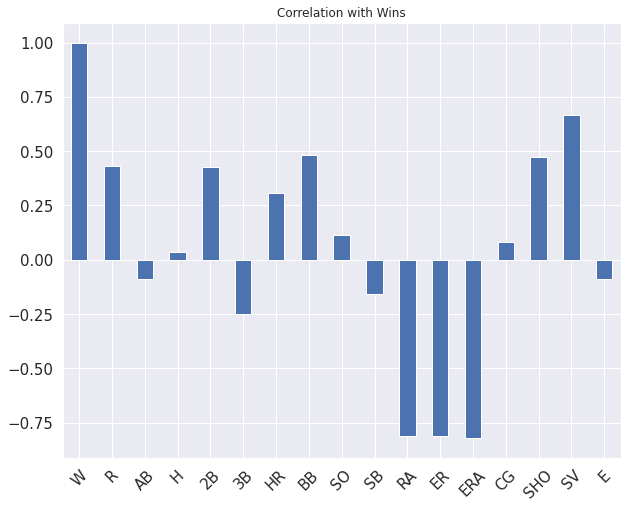

In [30]:
#Correlation of Wins(W) with respect to attributes

Ball.corrwith(Ball.W).plot.bar(
        figsize = (10, 8), title = "Correlation with Wins", fontsize = 15,
        rot = 45, grid = True)

**Observation :** 

From the Above plot , We observed that
1. Attributes namely R,H,2B,HR,BB,SO,CG,SHO,SV have high correlation w.r.t Wins i.e, means these attributes are helping the team to Win .

2. Attributes namely AB,3B,SB,RA,ER,ERA,E have -ve correlation w.r.t Wins i.e, means these attributes are causing the team to Loose .

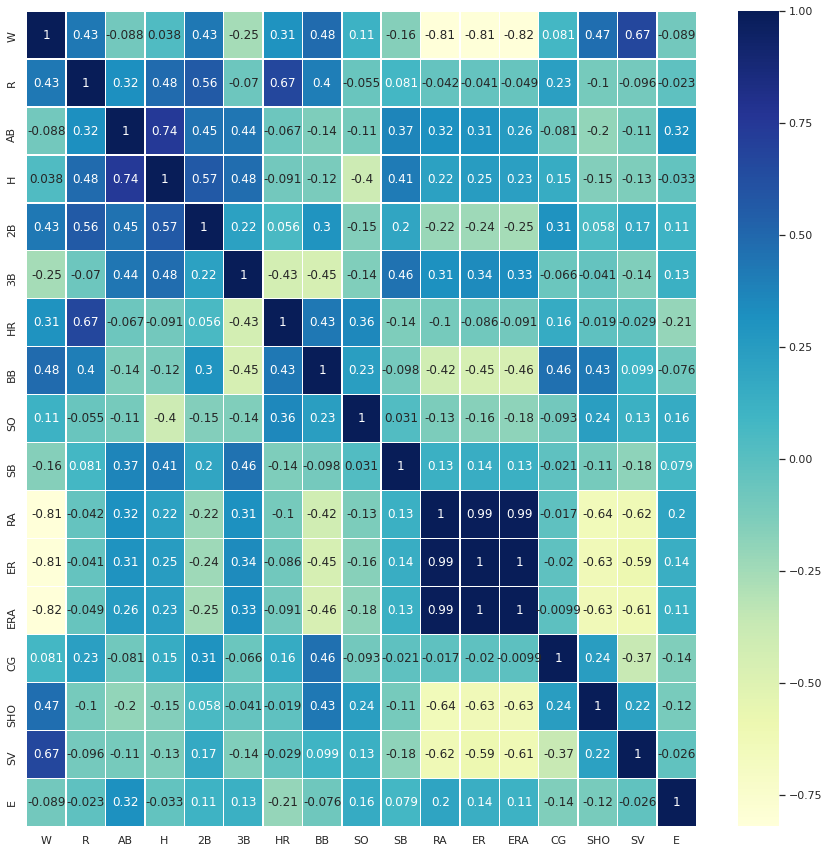

In [31]:
#Plotting Heatmap for Correlation between Variables .

plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,linewidths=.5,cmap="YlGnBu")
plt.show()

**Observations:** 

1. SV(Saves) is highly positively correlated with W(Wins).

2. ERA(Earned Run Average) is highly negatively correlated with W(Wins).

3. We can see that ERA(Earned Run Average) and ER(Earned Runs) are 0.99 positively correlated with RA(Run Allowed).

4. ER(Earned Runs), RA(Run Allowed), ERA(Earned Run Average) is highly negatively correlated with W(Wins). Hence Needed to be dropped .
5.SV(Saves) and SHO(Shutouts) are negatively correlated with RA(Run Allowed), ER(Earned Runs), and ERA(Earned Run Average), where RA(Run Allowed), ER(Earned Runs) and ERA(Earned Run Average) are negatively correlated with Wins.

In [32]:
cor['W'].sort_values(ascending=False)  #Display Coorelation values of all attributes

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

# **Data Cleaning**

**1.Checking Null Values**

In [33]:
Ball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

**Observation :** There are no null values present in the dataset .

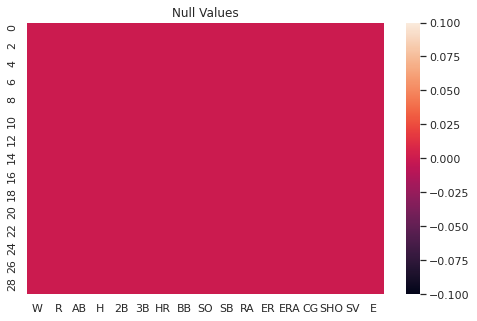

In [34]:
#Plotting Null Values

plt.figure(figsize=[8,5])
sns.heatmap(Ball.isnull())
plt.title("Null Values")
plt.show()

**Observation :** This is a very clean dataset .

**2.Checking for Outliers**

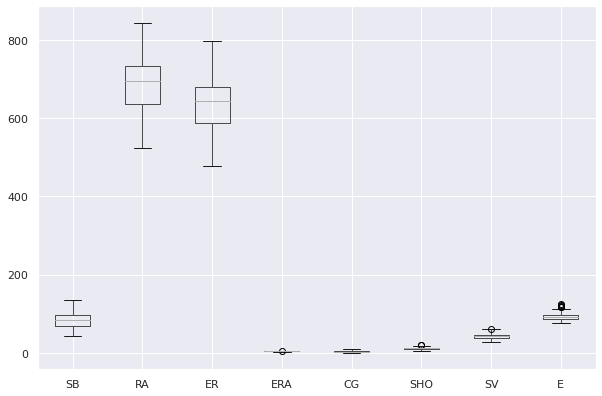

In [35]:
Ball.iloc[:,9:].boxplot(figsize=[10,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [36]:
#Compute Outliers using zscore method

from scipy.stats import zscore

z=np.abs(zscore(Ball))

new_Ball=Ball [(z<3).all(axis=1)]

In [37]:
Ball.shape

(30, 17)

In [38]:
new_Ball.shape

(29, 17)

In [39]:
((30-29)/30)*100 # Percentage of Loss of Data

3.3333333333333335

**Observation :** There will be a loss of 3.33% of data from the dataset which is very much affordable .But we have very small dataset of 30 rows . Hence it's good not to get rid of it .

**3.Checking for Skewness**

In [40]:
new_Ball.skew() # Checking Skewness

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

**Observation :**

Attributes namely H,CG,SHO,SV,E has skewness . Hence need to be removed .

In [41]:
#Using PowerTransformer 

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson')
for i in new_Ball.skew().index[1:]:
    if new_Ball.skew().loc[i]>0.55:
       new_Ball[i]=pt.fit_transform(new_Ball[i].values.reshape(-1,1))
    if new_Ball.skew().loc[i]<-0.55:
        new_Ball[i]=pt.fit_transform(new_Ball[i].values.reshape(-1,1))
    else:
        new_Ball[i]=new_Ball[i]

In [43]:
new_Ball.skew() #Checking Skewness again

W      0.119013
R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.526943
SV    -0.000925
E      0.065585
dtype: float64

**Observation :** The Data is propely skewed . Hence ready to be fitted for modelling .

# **Split Data and Target**

In [44]:
#Preparing the Data
#Setting X and y-axis .
#Since we want to predict the Winings of the Baseball Case Study , we will drop the ‘W’ column.

X=new_Ball.iloc[:,1:]
y=new_Ball.iloc[:,:1]

In [46]:
y

,W
0,95
1,83
2,81
3,76
4,74
6,87
7,81
8,80
9,78
10,88


**Scaling of Data**


In [45]:
#Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [47]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,0.0,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.813262,1.532753,-0.348265
1,0.331147,-0.702831,0.0,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.159299,0.312020,-0.540820
2,-0.274666,-1.100253,0.0,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.326982,-0.664137,-1.326125
3,-1.329231,0.233951,0.0,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.570122,-0.820689,0.650818
4,0.174084,1.255894,0.0,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.159299,-1.149165,-0.540820
5,1.856900,0.716535,0.0,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.121871,-1.785822,0.677176,0.082858
6,0.712585,-0.447345,0.0,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.732896,-0.326982,0.052325,-1.588197
7,-0.835605,-0.447345,0.0,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.870682,0.159299,1.908137,0.237592
8,1.497899,1.752672,0.0,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.121871,-0.326982,-0.365006,0.383386
9,1.565212,-0.078310,0.0,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.770649,-0.570122,0.312020,1.554265


**Finding best random state**

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

maxScore = 0
maxRS = 0

for i in range(1,1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    LR = LinearRegression()
    LR.fit(X_train,y_train)
    pred=LR.predict(X_test)
    acc=r2_score(y_test,pred)
    if acc>maxScore:
        maxScore=acc
        maxRS=i
print('best r2_score:',maxScore*100,'with random_state:',maxRS)

best r2_score: 91.76095324740244 with random_state: 304


***We can see that the best random State is 304 with an 91.76% r2_score.***

**Preparation of Test and Train Data**

The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

# **Building Model**

In [50]:
#Importing Packages

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import  mean_squared_error,mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

**1.Linear Regression** 

In [51]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
#Predicting and estimating the result

y_pred_lr = LR.predict(X_test)
print("Linear Regression Report: \n\n", LinearRegression(y_test, y_pred_lr))
print("Test Accuracy: {}%".format(round(LR.score(X_test, y_test)*100, 2)))

Linear Regression Report: 

 LinearRegression(copy_X=True,
                 fit_intercept=     W
0   95
13  76
24  63
19  64
6   87
3   76
23  67
29  68
25  92,
                 n_jobs=None,
                 normalize=array([[94.45858678],
       [80.00574366],
       [56.7812002 ],
       [62.94376294],
       [85.46226067],
       [77.85855649],
       [66.47594143],
       [62.33036091],
       [94.00648691]]))
Test Accuracy: 91.76%


In [53]:
print("1.Linear Regression")
print("___________________\n")
print("R2 Score:                ", r2_score(y_test,y_pred_lr))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,y_pred_lr))
print("Mean Squared error:      ", mean_squared_error(y_test,y_pred_lr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("\n")
print("Checking Cross Validation Score")
print("_______________________________\n")
score=cross_val_score(LR,X,y,cv=5).mean()
print(score)
print("cross validation score:  ", score)
print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,y_pred_lr)-abs(score.mean()))

1.Linear Regression
___________________

R2 Score:                 0.9176095324740244
Mean Absolute Error:      2.602074902900218
Mean Squared error:       10.932503024310925
Root Mean Squared Error:  3.3064335808104364


Checking Cross Validation Score
_______________________________

0.22227831723954045
cross validation score:   0.22227831723954045
Difference between R2 score and cross validatio score is -  0.6953312152344839


**2.Decision Tree Regressor**

In [54]:
DT = DecisionTreeRegressor()

DT.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [55]:
#Predicting and estimating the result

y_pred_dt = DT.predict(X_test)
print("Decision Tree Regressor Report: \n\n", DecisionTreeRegressor(y_test, y_pred_lr))
print("Test Accuracy: {}%".format(round(DT.score(X_test, y_test)*100, 2)))

Decision Tree Regressor Report: 

 DecisionTreeRegressor(ccp_alpha=0.0,
                      criterion=     W
0   95
13  76
24  63
19  64
6   87
3   76
23  67
29  68
25  92,
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None,
                      splitter=array([[94.45858678],
       [80.00574366],
       [56.7812002 ],
       [62.94376294],
       [85.46226067],
       [77.85855649],
       [66.47594143],
       [62.33036091],
       [94.00648691]]))
Test Accuracy: 32.17%


In [56]:
print("1.DecisionTreeRegressor")
print("_______________________\n")
print("R2 Score:                ", r2_score(y_test,y_pred_dt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,y_pred_dt))
print("Mean Squared error:      ", mean_squared_error(y_test,y_pred_dt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print("\n")
print("Checking Cross Validation Score")
print("_______________________________\n")
score=cross_val_score(DT,X,y,cv=5)
print(score)
print("cross validation score:  ", abs(score.mean()))
print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,y_pred_dt)-abs(score.mean()))

1.DecisionTreeRegressor
_______________________

R2 Score:                 0.321734276144399
Mean Absolute Error:      8.444444444444445
Mean Squared error:       90.0
Root Mean Squared Error:  9.486832980505138


Checking Cross Validation Score
_______________________________

[-2.00681818 -9.96052632  0.34169803  0.30819672 -0.76002358]
cross validation score:   2.4154946653813134
Difference between R2 score and cross validatio score is -  -2.0937603892369143


**3.Random Forest Regressor**

In [79]:
RFR = RandomForestRegressor()

RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [80]:
#Predicting and estimating the result

y_pred_rfr = RFR.predict(X_test)
print("Random Forest Regressor Report: \n\n", RandomForestRegressor(y_test, y_pred_rfr))
print("Test Accuracy: {}%".format(round(RFR.score(X_test, y_test)*100, 2)))

Random Forest Regressor Report: 

 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                      criterion=array([80.6 , 81.63, 70.31, 76.53, 84.16, 76.53, 78.37, 75.12, 91.95]),
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=     W
0   95
13  76
24  63
19  64
6   87
3   76
23  67
29  68
25  92,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Test Accuracy: 46.59%


In [81]:
print("3.Random Forest Regressor")
print("_________________________\n")
print("R2 Score:                ", r2_score(y_test,y_pred_rfr))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,y_pred_rfr))
print("Mean Squared error:      ", mean_squared_error(y_test,y_pred_rfr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred_rfr)))
print("\n")
print("Checking Cross Validation Score")
print("_______________________________\n")
score=cross_val_score(RFR,X,y,cv=5)
print(score)
print("cross validation score:  ", abs(score.mean()))
print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,y_pred_rfr)-abs(score.mean()))

3.Random Forest Regressor
_________________________

R2 Score:                 0.4659166542612576
Mean Absolute Error:      6.864444444444446
Mean Squared error:       70.86824444444449
Root Mean Squared Error:  8.418327888865132


Checking Cross Validation Score
_______________________________

[ 0.17393227 -5.00987368  0.50564668  0.36823672  0.85343779]
cross validation score:   0.6217240440658178
Difference between R2 score and cross validatio score is -  -0.15580738980456021


**4.GradientBoostingRegressor**

In [60]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
#Predicting and estimating the result

y_pred_gb = GBR.predict(X_test)
print("KNeighborsRegressor Report: \n\n", GradientBoostingRegressor(y_test, y_pred_gb))
print("Test Accuracy: {}%".format(round(GBR.score(X_test, y_test)*100, 2)))

KNeighborsRegressor Report: 

 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None,
                          learning_rate=array([83.88064114, 84.87068679, 68.00347361, 78.26232198, 85.41093446,
       72.03510063, 77.83138394, 77.85966343, 92.75627921]),
                          loss=     W
0   95
13  76
24  63
19  64
6   87
3   76
23  67
29  68
25  92,
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Test Accuracy: 44.39%


In [62]:
print("4.GradientBoostingRegressor")
print("___________________________\n")
print("R2 Score:                ", r2_score(y_test,y_pred_gb))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,y_pred_gb))
print("Mean Squared error:      ", mean_squared_error(y_test,y_pred_gb))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred_gb)))
print("\n")
print("Checking Cross Validation Score")
print("_______________________________\n")
score=cross_val_score(GBR,X,y,cv=5)
print(score)
print("cross validation score:  ", abs(score.mean()))
print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,y_pred_gb)-abs(score.mean()))

4.GradientBoostingRegressor
___________________________

R2 Score:                 0.44388310209863924
Mean Absolute Error:      7.361903637278924
Mean Squared error:       73.79190640301019
Root Mean Squared Error:  8.590221557271395


Checking Cross Validation Score
_______________________________

[-0.05060564 -8.36574221  0.50345979  0.57645773  0.74178876]
cross validation score:   1.3189283125244962
Difference between R2 score and cross validatio score is -  -0.8750452104258569


**5.Ridge**

In [63]:
RD = Ridge()
RD.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
#Predicting and estimating the result

y_pred_rd = RD.predict(X_test)
print("Ridge Report: \n\n", Ridge(y_test, y_pred_rd))
print("Test Accuracy: {}%".format(round(RD.score(X_test, y_test)*100, 2)))

Ridge Report: 

 Ridge(alpha=     W
0   95
13  76
24  63
19  64
6   87
3   76
23  67
29  68
25  92,
      copy_X=True,
      fit_intercept=array([[89.49960187],
       [79.10357356],
       [60.9258289 ],
       [67.25245705],
       [88.10910401],
       [73.95257903],
       [69.65753209],
       [66.64064683],
       [91.91745127]]),
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)
Test Accuracy: 94.21%


In [65]:
print("5.Ridge")
print("_______\n")
print("R2 Score:                ", r2_score(y_test,y_pred_rd))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,y_pred_rd))
print("Mean Squared error:      ", mean_squared_error(y_test,y_pred_rd))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred_rd)))
print("\n")
print("Checking Cross Validation Score")
print("_______________________________\n")
score=cross_val_score(RD,X,y,cv=5)
print(score)
print("cross validation score:  ", abs(score.mean()))
print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,y_pred_rd)-abs(score.mean()))

5.Ridge
_______

R2 Score:                 0.9421327235024413
Mean Absolute Error:      2.35406209026658
Mean Squared error:       7.678487503651378
Root Mean Squared Error:  2.771008391118904


Checking Cross Validation Score
_______________________________

[ 0.55087669 -0.83833938  0.71540138  0.91201713  0.81415712]
cross validation score:   0.4308225887297448
Difference between R2 score and cross validatio score is -  0.5113101347726965


**6.SVR**

In [66]:
SV = SVR()
SV.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [67]:
#Predicting and estimating the result

y_pred_sv = SV.predict(X_test)
print("SVR Report: \n\n", SVR(y_test, y_pred_sv))
print("Test Accuracy: {}%".format(round(SV.score(X_test,y_test)*100, 2)))

SVR Report: 

 SVR(C=1.0, cache_size=200, coef0=0.0,
    degree=array([81.21115515, 81.44694842, 79.69683297, 80.26506582, 81.56065006,
       80.53963974, 80.92217609, 80.38580006, 82.31842475]),
    epsilon=0.1, gamma='scale',
    kernel=     W
0   95
13  76
24  63
19  64
6   87
3   76
23  67
29  68
25  92,
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Test Accuracy: -5.03%


In [68]:
print("6.SVR")
print("_____\n")
print("R2 Score:                ", r2_score(y_test,y_pred_sv))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,y_pred_sv))
print("Mean Squared error:      ", mean_squared_error(y_test,y_pred_sv))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred_sv)))
print("\n")
print("Checking Cross Validation Score")
print("_______________________________\n")
score=cross_val_score(SV,X,y,cv=5)
print(score)
print("cross validation score:  ", abs(score.mean()))
print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,y_pred_sv)-abs(score.mean()))

6.SVR
_____

R2 Score:                 -0.050307764865456184
Mean Absolute Error:      10.907359237459419
Mean Squared error:       139.3667636638756
Root Mean Squared Error:  11.805370119732611


Checking Cross Validation Score
_______________________________

[-6.95802759e-02 -1.19675514e+00 -9.41113462e-04 -3.94053545e-01
  2.10937787e-01]
cross validation score:   0.2900784566617035
Difference between R2 score and cross validatio score is -  -0.3403862215271597


**Let's check with regularization models now .**

In [69]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

**7.ELASTIC_NET**

In [70]:
EN = ElasticNet()
EN.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
#Predicting and estimating the result

y_pred_en = EN.predict(X_test)
print("Elastic_NET Report: \n\n", ElasticNet(y_test, y_pred_en))
print("Test Accuracy: {}%".format(round(EN.score(X_test,y_test)*100, 2)))

Elastic_NET Report: 

 ElasticNet(alpha=     W
0   95
13  76
24  63
19  64
6   87
3   76
23  67
29  68
25  92,
           copy_X=True, fit_intercept=True,
           l1_ratio=array([84.59316372, 79.99190253, 68.22691272, 73.77108042, 84.44905582,
       75.47191575, 74.79623712, 67.82519226, 90.46021702]),
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Test Accuracy: 73.46%


In [72]:
print("7.Elastic_Net")
print("_____________")
print("R2 Score:                ", r2_score(y_test,y_pred_en))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,y_pred_en))
print("Mean Squared error:      ", mean_squared_error(y_test,y_pred_en))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred_en)))

print("\n")
print("Checking Cross Validation Score")
print("_______________________________\n")
score=cross_val_score(EN,X,y,cv=5)
print(score)
print("cross validation score:  ", abs(score.mean()))
print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,y_pred_en)-abs(score.mean()))

7.Elastic_Net
_____________
R2 Score:                 0.7345543048132761
Mean Absolute Error:      4.6651764685621835
Mean Squared error:       35.22234977613468
Root Mean Squared Error:  5.934842017790758


Checking Cross Validation Score
_______________________________

[ 0.56709598 -0.79632468  0.68141449  0.66683134  0.91990806]
cross validation score:   0.4077850387969928
Difference between R2 score and cross validatio score is -  0.3267692660162833


**8.LASSO**

In [73]:
LA = Lasso()
LA.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
#Predicting and estimating the result

y_pred_la = LA.predict(X_test)
print("Lasso Report: \n\n", Lasso(y_test, y_pred_la))
print("Test Accuracy: {}%".format(round(LA.score(X_test,y_test)*100, 2)))

Lasso Report: 

 Lasso(alpha=     W
0   95
13  76
24  63
19  64
6   87
3   76
23  67
29  68
25  92,
      copy_X=True,
      fit_intercept=array([86.88672195, 80.14603764, 67.22718491, 73.10893882, 85.8093703 ,
       74.67393132, 74.94201024, 67.54745195, 90.44204264]),
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Test Accuracy: 78.84%


In [78]:
print("7.LASSO")
print("_______\n")
print("R2 Score:                ", r2_score(y_test,y_pred_la))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,y_pred_la))
print("Mean Squared error:      ", mean_squared_error(y_test,y_pred_la))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred_la)))
print("\n")
print("Checking Cross Validation Score")
print("_______________________________\n")
score=cross_val_score(LA,X,y,cv=5)
print(score)
print("cross validation score:  ", abs(score.mean()))
print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,y_pred_la)-abs(score.mean()))

7.LASSO
_______

R2 Score:                 0.788364026853808
Mean Absolute Error:      4.229405938523245
Mean Squared error:       28.082264683645327
Root Mean Squared Error:  5.299270202928449


Checking Cross Validation Score
_______________________________

[ 0.73299979 -0.64192586  0.75601063  0.78871374  0.8807743 ]
cross validation score:   0.5033145206918561
Difference between R2 score and cross validatio score is -  0.2850495061619519


**Observation :** 

After performing all Regression Model on the Dataset , it is concluded that Linear Regression has the best r2 score i.e, 0.917 and Support vector machine(SVR) has the worst r2 score i.e, -0.050 . But difference between r2 score and cross validation score is least in Lasso Regularization Model .

Hence Lasso Regularization Model is our best fitted model to perform for Hyper Parameter Tuning .

# **Hyper Parameter Tuning**

In [86]:
#import the randomized search CV

from sklearn.model_selection import GridSearchCV

parameter={'alpha': [0.1,1.0],
           'fit_intercept': ['bool'],
           'max_iter' : [10,100,500,1000],
           'selection' :['cyclic', 'random']}

In [87]:
GCV=GridSearchCV(Lasso(),parameter,cv=5)

In [88]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 1.0], 'fit_intercept': ['bool'],
                         'max_iter': [10, 100, 500, 1000],
                         'selection': ['cyclic', 'random']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [89]:
GCV.best_params_

{'alpha': 1.0, 'fit_intercept': 'bool', 'max_iter': 100, 'selection': 'random'}

In [92]:
Baseball_mod = Lasso(alpha = 1.0 , fit_intercept = 'bool' , max_iter = 100 , selection = 'random')
Baseball_mod.fit(X_train,y_train)
lasso_pred=Baseball_mod.predict(X_test)

r_squared = r2_score(y_test, lasso_pred)
print("Final accuracy Score for the best fitted model is :", r_squared*100)

Final accuracy Score for the best fitted model is : 78.86655041007717


**Observation :**

Our Model almost learn't 79% accuracy .

In [93]:
#Checking Mean,Root_Mean,Absolute Error and Cross_Val_Score 

print("Mean Absolute Error:     ", mean_absolute_error(y_test,lasso_pred))
print("Mean Squared error:      ", mean_squared_error(y_test,lasso_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,lasso_pred)))
print("\n")
print("Checking Cross Validation Score")
print("_______________________________\n")
score=cross_val_score(Baseball_mod,X,y,cv=5)
print(score)
print("cross validation score:  ", abs(score.mean()))

Mean Absolute Error:      4.226940839792298
Mean Squared error:       28.042261258332175
Root Mean Squared Error:  5.29549443001616


Checking Cross Validation Score
_______________________________

[ 0.72812533 -0.60441955  0.75587504  0.78260783  0.88078656]
cross validation score:   0.5085950407711262


**Observation :**

After performing HyperParameter Tuning , we got an accurcy value of 78.86% and Root mean squared error of 5.295 for Lasso Regularization Model .

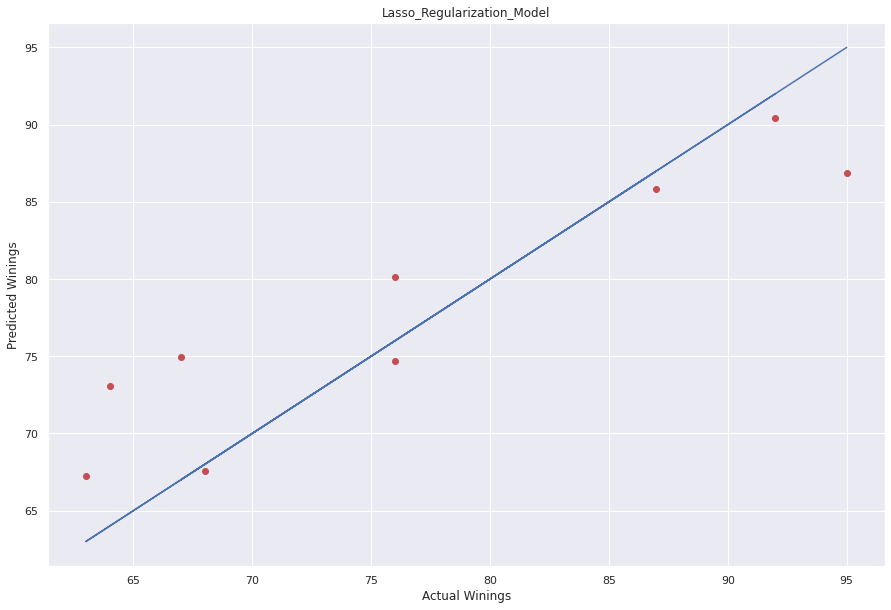

In [94]:
# plotting the Best Fitted Model

plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=lasso_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Winings')
plt.ylabel('Predicted Winings')
plt.title('Lasso_Regularization_Model')
plt.show()

**Observation**: Above plotted figure shows all predicted values in red dotted points .

**Concluded Prediction**

In [96]:
# Printing predicted values

lasso_pred = lasso_pred.astype('int')
test=pd.DataFrame(data=y_test,)
test['Predicted values']=lasso_pred
test
# On the lest side values are those which are taken by machine for test...

,W,Predicted values
0,95,86
13,76,80
24,63,67
19,64,73
6,87,85
3,76,74
23,67,74
29,68,67
25,92,90


# **Saving Final Model**

In [97]:
# Saving the Predicted values in csv file

test.to_csv('Baseball Case Study.csv')

In [98]:
# Dumping Data in pickle file.

import joblib
joblib.dump(RFR,'Baseball Case Study.pkl')

['Baseball Case Study.pkl']